In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("meteorite-landings.csv")
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
df = df.dropna(subset = ["reclong","reclat"])
df = df[df.reclong < 300]

2D Histograms

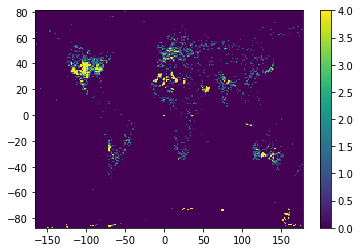

In [ ]:
plt.hist2d(df.reclong,df.reclat,bins=200,vmax = 4)
plt.colorbar();

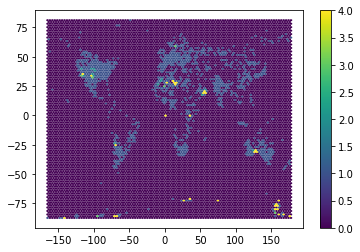

In [ ]:
plt.hexbin(df.reclong,df.reclat,bins=200,vmax = 4, lw = 0.0)
plt.colorbar();

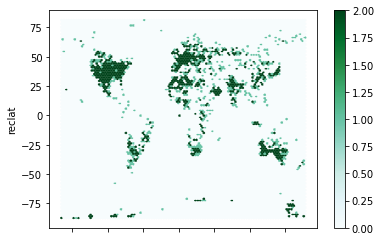

In [ ]:
df.plot.hexbin(x = "reclong",y = "reclat",gridsize=100,vmax = 2, linewidth = 0.25)

Contour plots

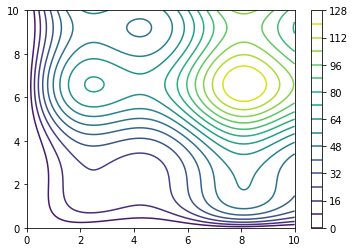

In [ ]:
spacing = np.linspace(0,10,200)
X,Y = np.meshgrid(spacing,spacing)
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2
plt.contour(X,Y,Z,levels = 20)
plt.colorbar()

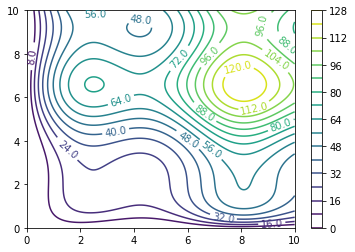

In [ ]:
c = plt.contour(X,Y,Z,levels=20)
plt.clabel(c,inline= True,fmt = "%0.1f")
plt.colorbar();

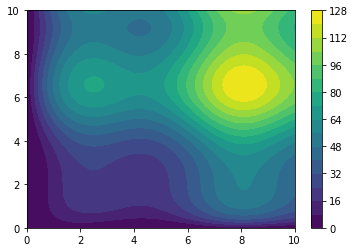

In [ ]:
c = plt.contourf(X,Y,Z,levels=20)
plt.colorbar();

<a list of 10 text.Text objects>

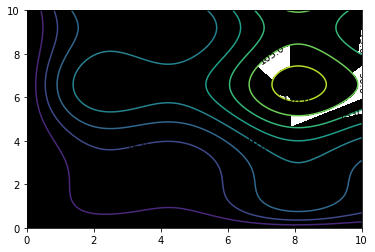

In [ ]:
plt.contour(X,Y,Z,levels = 10)
c = plt.contourf(X,Y,Z,levels=10,colors="black")
plt.clabel(c,inline=True,fmt="%0.1f")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


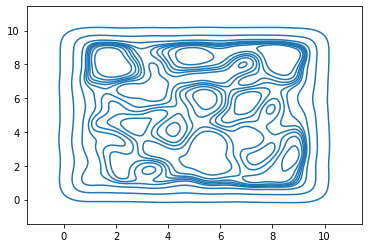

In [ ]:
n = 50000
xs,ys = np.random.uniform(0,10,n), np.random.uniform(0,10,n)
sns.kdeplot(xs,ys)

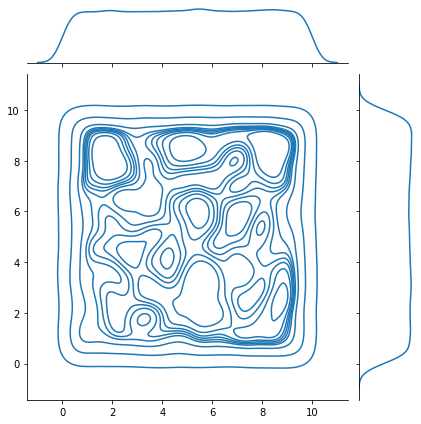

In [ ]:
sns.jointplot(x=xs,y=ys,kind="kde")

In [ ]:
sns.pairplot(data = df[["reclat","reclong","mass"]])

Pandas Styling for tables !!!


In [24]:
df = pd.DataFrame(np.random.normal(size=(6,6)),columns = [x for x in "ABCDEF"])
df

,A,B,C,D,E,F
0,-0.776540,-1.317118,0.283476,-0.358312,0.360421,-0.329562
1,0.612904,0.319963,-0.015246,-0.629171,0.708188,-0.233492
2,0.991909,1.414386,-1.436813,-0.397586,-0.280581,-0.230545
3,1.416473,-0.246652,-0.591309,0.755112,0.169077,0.483278
4,0.549191,-0.622787,-0.135824,1.240980,-0.033828,1.922164
5,0.521690,-0.334665,0.790556,0.164892,0.399949,-0.091028


In [25]:
def neg_red(x):
  return f"color : {'red' if x < 0 else 'white'}"
df.style.applymap(neg_red)  

,A,B,C,D,E,F
0,-0.776540,-1.317118,0.283476,-0.358312,0.360421,-0.329562
1,0.612904,0.319963,-0.015246,-0.629171,0.708188,-0.233492
2,0.991909,1.414386,-1.436813,-0.397586,-0.280581,-0.230545
3,1.416473,-0.246652,-0.591309,0.755112,0.169077,0.483278
4,0.549191,-0.622787,-0.135824,1.240980,-0.033828,1.922164
5,0.521690,-0.334665,0.790556,0.164892,0.399949,-0.091028


In [26]:
def gold_max(xs):
  m = xs.to_numpy().max()
  color = {True:"background-color:#c78f2e",False: ""}
  is_max = (xs == m).replace(color)
  return is_max
df.style.apply(gold_max,axis=0)    

,A,B,C,D,E,F
0,-0.776540,-1.317118,0.283476,-0.358312,0.360421,-0.329562
1,0.612904,0.319963,-0.015246,-0.629171,0.708188,-0.233492
2,0.991909,1.414386,-1.436813,-0.397586,-0.280581,-0.230545
3,1.416473,-0.246652,-0.591309,0.755112,0.169077,0.483278
4,0.549191,-0.622787,-0.135824,1.240980,-0.033828,1.922164
5,0.521690,-0.334665,0.790556,0.164892,0.399949,-0.091028


In [27]:
df.style.background_gradient(cmap="magma")

,A,B,C,D,E,F
0,-0.776540,-1.317118,0.283476,-0.358312,0.360421,-0.329562
1,0.612904,0.319963,-0.015246,-0.629171,0.708188,-0.233492
2,0.991909,1.414386,-1.436813,-0.397586,-0.280581,-0.230545
3,1.416473,-0.246652,-0.591309,0.755112,0.169077,0.483278
4,0.549191,-0.622787,-0.135824,1.240980,-0.033828,1.922164
5,0.521690,-0.334665,0.790556,0.164892,0.399949,-0.091028


In [28]:
df.abs().style.bar(align="left",width=100)

,A,B,C,D,E,F
0,0.776540,1.317118,0.283476,0.358312,0.360421,0.329562
1,0.612904,0.319963,0.015246,0.629171,0.708188,0.233492
2,0.991909,1.414386,1.436813,0.397586,0.280581,0.230545
3,1.416473,0.246652,0.591309,0.755112,0.169077,0.483278
4,0.549191,0.622787,0.135824,1.240980,0.033828,1.922164
5,0.521690,0.334665,0.790556,0.164892,0.399949,0.091028


In [33]:
head = {"selector": "th","props":[("text-align","center")]}
df.style.set_table_styles([head]).bar(align = "mid",color=['red','green'],vmin = 3,vmax = 3)

,A,B,C,D,E,F
0,-0.776540,-1.317118,0.283476,-0.358312,0.360421,-0.329562
1,0.612904,0.319963,-0.015246,-0.629171,0.708188,-0.233492
2,0.991909,1.414386,-1.436813,-0.397586,-0.280581,-0.230545
3,1.416473,-0.246652,-0.591309,0.755112,0.169077,0.483278
4,0.549191,-0.622787,-0.135824,1.240980,-0.033828,1.922164
5,0.521690,-0.334665,0.790556,0.164892,0.399949,-0.091028


In [36]:
df.style.bar(align="mid",width=50).apply(gold_max, axis = 0).applymap(neg_red)

,A,B,C,D,E,F
0,-0.776540,-1.317118,0.283476,-0.358312,0.360421,-0.329562
1,0.612904,0.319963,-0.015246,-0.629171,0.708188,-0.233492
2,0.991909,1.414386,-1.436813,-0.397586,-0.280581,-0.230545
3,1.416473,-0.246652,-0.591309,0.755112,0.169077,0.483278
4,0.549191,-0.622787,-0.135824,1.240980,-0.033828,1.922164
5,0.521690,-0.334665,0.790556,0.164892,0.399949,-0.091028
